# Постановка задачи
Данный датасет содержит информацию о 1273 ноутбуках, представленных на рынке. В таблице включены следующие столбцы:

1. Company: Производитель ноутбука.
2. TypeName: Тип ноутбука (например, ультрабук, ноутбук, игровой и т. д.).
3. Ram: Объем оперативной памяти в гигабайтах (GB).
4. Weight: Вес ноутбука в килограммах (кг).
5. Price: Цена ноутбука в заданной валюте (например, долларах США).
6. TouchScreen: Наличие сенсорного экрана (0 - нет, 1 - есть).
7. Ips: Наличие технологии IPS (In-Plane Switching) в экране (0 - нет, 1 - есть).
8. Ppi: Плотность пикселей (Pixels Per Inch) экрана, что влияет на четкость изображения.
9. Cpu_brand: Бренд процессора, установленного в ноутбуке (например, Intel, AMD и т. д.).
10. HDD: Объем жесткого диска в гигабайтах (GB).
11. SSD: Объем твердотельного накопителя в гигабайтах (GB).
12. Gpu_brand: Бренд графического процессора.
13. Os: Операционная система, установленная на ноутбуке (например, Windows, Mac).

Необходимо научиться предсказывать цену ноутбука на основе заданных характеристик.

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Загрузка и чтение данных

Загрузим данные с локального диска:

In [2]:
data_raw = pd.read_csv('laptop_data_cleaned.csv')

In [3]:
data_raw

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0.0,1.0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0.0,0.0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,NaN,0.0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0.0,1.0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0.0,1.0,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0.0,0.0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1.0,1.0,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1.0,1.0,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0.0,0.0,111.935204,Other Intel Processor,0,0,Intel,NaN


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1267 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1257 non-null   float64
 6   Ips          1267 non-null   float64
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1266 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 129.4+ KB


# Обработка пропущенных значений

Посмотрим на наличие пропущенных значений:

In [5]:
data_raw.isnull().sum()

,0
Company,0
TypeName,6
Ram,0
Weight,0
Price,0
TouchScreen,16
Ips,6
Ppi,0
Cpu_brand,0
HDD,0


Можно удалить строки из датасета с пропущеными значениями, т.к. их не так много.

In [6]:
data_raw = data_raw.dropna()
data_raw.isnull().sum()

,0
Company,0
TypeName,0
Ram,0
Weight,0
Price,0
TouchScreen,0
Ips,0
Ppi,0
Cpu_brand,0
HDD,0


# Обработка категориальных признаков
Выведем информацию о типах признаков.

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1242 non-null   object 
 1   TypeName     1242 non-null   object 
 2   Ram          1242 non-null   int64  
 3   Weight       1242 non-null   float64
 4   Price        1242 non-null   float64
 5   TouchScreen  1242 non-null   float64
 6   Ips          1242 non-null   float64
 7   Ppi          1242 non-null   float64
 8   Cpu_brand    1242 non-null   object 
 9   HDD          1242 non-null   int64  
 10  SSD          1242 non-null   int64  
 11  Gpu_brand    1242 non-null   object 
 12  Os           1242 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 135.8+ KB


Изменим остальные признаки типа `object` на `category`:

In [8]:
columns_for_category = ["Company", "TypeName", "Cpu_brand", "Gpu_brand", "Os"]

data_raw[columns_for_category] = data_raw[columns_for_category].astype('category')

<ipython-input-8-ae2aebdc08bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw[columns_for_category] = data_raw[columns_for_category].astype('category')


In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Company      1242 non-null   category
 1   TypeName     1242 non-null   category
 2   Ram          1242 non-null   int64   
 3   Weight       1242 non-null   float64 
 4   Price        1242 non-null   float64 
 5   TouchScreen  1242 non-null   float64 
 6   Ips          1242 non-null   float64 
 7   Ppi          1242 non-null   float64 
 8   Cpu_brand    1242 non-null   category
 9   HDD          1242 non-null   int64   
 10  SSD          1242 non-null   int64   
 11  Gpu_brand    1242 non-null   category
 12  Os           1242 non-null   category
dtypes: category(5), float64(5), int64(3)
memory usage: 94.8 KB


Нужно выяснить, сколько уникальных значений содержат признаки `Company`, `TypeName`, `Cpu_brand`, `Gpu_brand` и `Os`.

In [10]:
data_raw['Company'].unique()

['Apple', 'Acer', 'Asus', 'HP', 'Dell', ..., 'Google', 'Fujitsu', 'Samsung', 'LG', 'Vero']
Length: 19
Categories (19, object): ['Acer', 'Apple', 'Asus', 'Chuwi', ..., 'Samsung', 'Toshiba', 'Vero',
                          'Xiaomi']

In [11]:
data_raw['TypeName'].unique()

['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible', 'Workstation', 'Netbook']
Categories (6, object): ['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation']

In [12]:
data_raw['Cpu_brand'].unique()

['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3', 'Other Intel Processor']
Categories (5, object): ['AMD Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
                         'Other Intel Processor']

In [13]:
data_raw['Gpu_brand'].unique()

['Intel', 'AMD', 'Nvidia']
Categories (3, object): ['AMD', 'Intel', 'Nvidia']

In [14]:
data_raw['Os'].unique()

['Mac', 'Windows', 'Others', 'Window']
Categories (4, object): ['Mac', 'Others', 'Window', 'Windows']

Для категориальных признаков применяем One-Hot Encoding.

In [15]:
data_raw = pd.get_dummies(data_raw, columns=columns_for_category)
data_raw = data_raw.replace({False: 0, True: 1})

data_raw

<ipython-input-15-02463550503d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_raw = data_raw.replace({False: 0, True: 1})


,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Acer,Company_Apple,...,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Mac,Os_Others,Os_Window,Os_Windows
0,8,1.37,11.175755,0.0,1.0,226.983005,0,128,0,1,...,1,0,0,0,1,0,1,0,0,0
1,8,1.34,10.776777,0.0,0.0,127.677940,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
3,16,1.83,11.814476,0.0,1.0,220.534624,0,512,0,1,...,0,1,0,1,0,0,1,0,0,0
4,8,1.37,11.473101,0.0,1.0,226.983005,0,256,0,1,...,1,0,0,0,1,0,1,0,0,0
5,4,2.10,9.967026,0.0,0.0,100.454670,500,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,2,1.17,9.317895,0.0,0.0,135.094211,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1268,4,2.20,10.555257,0.0,0.0,100.454670,500,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1269,4,1.80,10.433899,1.0,1.0,157.350512,0,128,0,0,...,0,1,0,0,1,0,0,0,0,1
1270,16,1.30,11.288115,1.0,1.0,276.053530,0,512,0,0,...,0,1,0,0,1,0,0,0,0,1


In [16]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1272
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ram                              1242 non-null   int64  
 1   Weight                           1242 non-null   float64
 2   Price                            1242 non-null   float64
 3   TouchScreen                      1242 non-null   float64
 4   Ips                              1242 non-null   float64
 5   Ppi                              1242 non-null   float64
 6   HDD                              1242 non-null   int64  
 7   SSD                              1242 non-null   int64  
 8   Company_Acer                     1242 non-null   int64  
 9   Company_Apple                    1242 non-null   int64  
 10  Company_Asus                     1242 non-null   int64  
 11  Company_Chuwi                    1242 non-null   int64  
 12  Company_Dell             

In [17]:
data_raw

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Acer,Company_Apple,...,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Mac,Os_Others,Os_Window,Os_Windows
0,8,1.37,11.175755,0.0,1.0,226.983005,0,128,0,1,...,1,0,0,0,1,0,1,0,0,0
1,8,1.34,10.776777,0.0,0.0,127.677940,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
3,16,1.83,11.814476,0.0,1.0,220.534624,0,512,0,1,...,0,1,0,1,0,0,1,0,0,0
4,8,1.37,11.473101,0.0,1.0,226.983005,0,256,0,1,...,1,0,0,0,1,0,1,0,0,0
5,4,2.10,9.967026,0.0,0.0,100.454670,500,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,2,1.17,9.317895,0.0,0.0,135.094211,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1268,4,2.20,10.555257,0.0,0.0,100.454670,500,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1269,4,1.80,10.433899,1.0,1.0,157.350512,0,128,0,0,...,0,1,0,0,1,0,0,0,0,1
1270,16,1.30,11.288115,1.0,1.0,276.053530,0,512,0,0,...,0,1,0,0,1,0,0,0,0,1


На этом можно закончить обработку данных.

# Визуализация данных и вычисление основных характеристик

После обработки данных требуется визуализировать их, а также вычислить основные характеристики.

In [18]:
data_raw[["Ram", "Weight", "Price", "Ppi", "HDD", "SSD"]].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Ram,Weight,Price,Ppi,HDD,SSD
0.005,2.00,0.91205,9.319653,100.454670,0.0,0.0
0.010,2.82,0.94050,9.483294,100.454670,0.0,0.0
0.050,4.00,1.17050,9.775106,100.454670,0.0,0.0
0.100,4.00,1.25280,9.989276,100.454670,0.0,0.0
0.500,8.00,2.04000,10.881314,141.211998,0.0,256.0
0.900,16.00,2.80000,11.600668,176.232574,1000.0,512.0
0.950,16.00,3.20000,11.778996,254.671349,1000.0,512.0
0.990,32.00,4.42000,12.031337,302.803224,2000.0,1000.0
0.995,32.00,4.42000,12.229198,331.264236,2000.0,1000.0


Можно заметить, что практически нет значений, которые бы сильно выбивались из общего числа.

Рассмотрим некоторые признаки на наличие выбросов:

<Axes: >

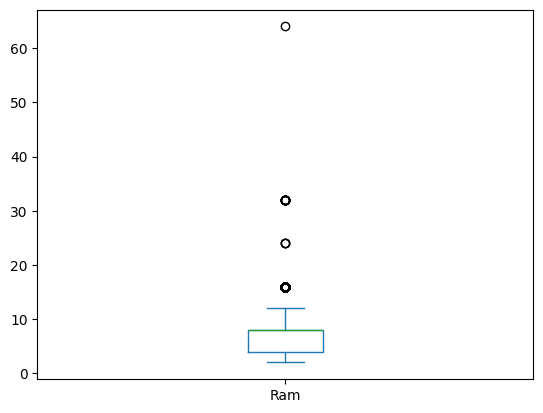

In [19]:
data_raw['Ram'].plot(kind='box')

<Axes: >

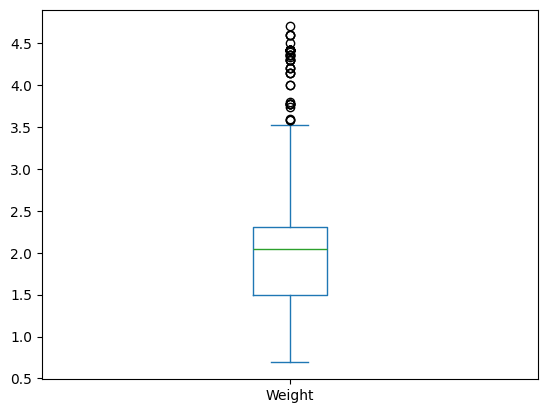

In [20]:
data_raw['Weight'].plot(kind='box')

<Axes: >

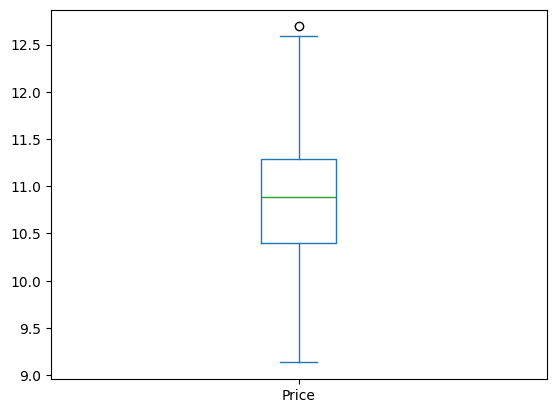

In [21]:
data_raw['Price'].plot(kind='box')

<Axes: >

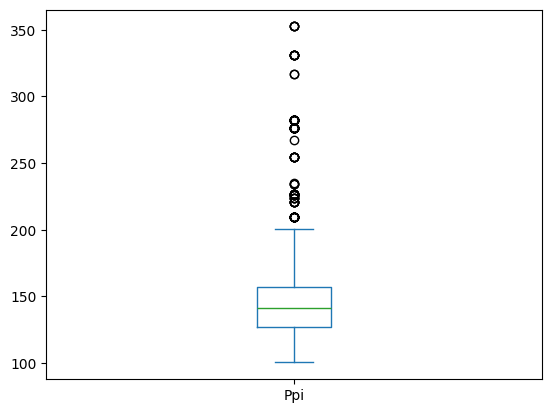

In [22]:
data_raw['Ppi'].plot(kind='box')

In [23]:
data_raw[["Ram", "Ppi"]].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Ram,Ppi
0.005,2.00,100.454670
0.010,2.82,100.454670
0.050,4.00,100.454670
0.100,4.00,100.454670
0.500,8.00,141.211998
0.900,16.00,176.232574
0.950,16.00,254.671349
0.990,32.00,302.803224
0.995,32.00,331.264236


Boxplot показали, что в столбцах `Ram` и `Ppi` много выбросов, поэтому удалим строки с этими признаками, которые выходят за пределы квантиля 0.95.

In [24]:
rows_to_drop = data_raw[(data_raw['Ram'] > data_raw['Ram'].quantile(0.95)) |
                        (data_raw['Ppi'] > data_raw['Ppi'].quantile(0.95))].index
data_raw = data_raw.drop(rows_to_drop)
data_raw.shape

(1161, 45)

Теперь посмотрим, как изменились Boxplot для этих признаков:

<Axes: >

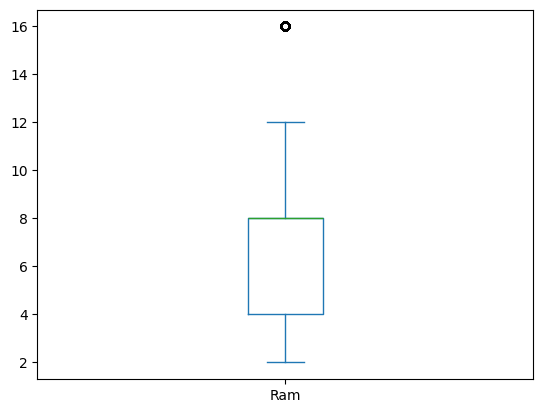

In [25]:
data_raw['Ram'].plot(kind='box')

<Axes: >

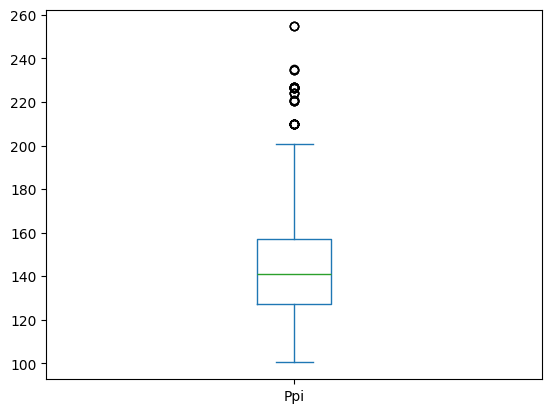

In [26]:
data_raw['Ppi'].plot(kind='box')

Вычислим среднее значение для некоторых признаков:

In [27]:
means = data_raw.select_dtypes(include=['number']).mean()
print(means)

Ram                                  7.903531
Weight                               2.031283
Price                               10.787210
TouchScreen                          0.121447
Ips                                  0.265289
Ppi                                139.546644
HDD                                425.202412
SSD                                170.084410
Company_Acer                         0.083549
Company_Apple                        0.018088
Company_Asus                         0.117140
Company_Chuwi                        0.001723
Company_Dell                         0.216193
Company_Fujitsu                      0.002584
Company_Google                       0.002584
Company_HP                           0.213609
Company_Huawei                       0.001723
Company_LG                           0.002584
Company_Lenovo                       0.230835
Company_MSI                          0.043928
Company_Mediacom                     0.006029
Company_Microsoft                 

Далее вычислим разбросы, т.е. разницу между максимальным и минимальным значениями:

In [28]:
ranges = data_raw.select_dtypes(include=['number']).apply(lambda x: x.max() - x.min())
print(ranges)

Ram                                  14.000000
Weight                                3.910000
Price                                 3.227801
TouchScreen                           1.000000
Ips                                   1.000000
Ppi                                 154.216679
HDD                                2000.000000
SSD                                1024.000000
Company_Acer                          1.000000
Company_Apple                         1.000000
Company_Asus                          1.000000
Company_Chuwi                         1.000000
Company_Dell                          1.000000
Company_Fujitsu                       1.000000
Company_Google                        1.000000
Company_HP                            1.000000
Company_Huawei                        1.000000
Company_LG                            1.000000
Company_Lenovo                        1.000000
Company_MSI                           1.000000
Company_Mediacom                      1.000000
Company_Micro

Также среднее и минимальные/максимальные значения можно посмотреть в таблице ниже:

In [29]:
data_raw.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Acer,Company_Apple,...,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Mac,Os_Others,Os_Window,Os_Windows
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,...,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,7.903531,2.031283,10.787210,0.121447,0.265289,139.546644,425.202412,170.084410,0.083549,0.018088,...,0.347976,0.385013,0.103359,0.147287,0.551249,0.301464,0.018088,0.123170,0.000861,0.857881
std,3.843175,0.618775,0.589919,0.326787,0.441677,27.487394,518.504136,165.308394,0.276829,0.133327,...,0.476534,0.486808,0.304559,0.354544,0.497581,0.459092,0.133327,0.328773,0.029348,0.349322
min,2.000000,0.690000,9.134616,0.000000,0.000000,100.454670,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.580000,10.370806,0.000000,0.000000,127.335675,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.000000,2.040000,10.830970,0.000000,0.000000,141.211998,0.000000,128.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8.000000,2.300000,11.219074,0.000000,1.000000,157.350512,1000.000000,256.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,16.000000,4.600000,12.362418,1.000000,1.000000,254.671349,2000.000000,1024.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Далее построим корреляционную матрицу.

In [30]:
corr_mat = data_raw.corr()
corr_mat

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Acer,Company_Apple,...,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Mac,Os_Others,Os_Window,Os_Windows
Ram,1.000000,0.310448,0.699384,0.058759,0.187763,0.270024,0.142111,0.529193,-0.144752,0.050516,...,-0.177472,0.608747,-0.306702,-0.071811,-0.340024,0.423989,0.050516,-0.180259,-0.029835,0.152881
Weight,0.310448,1.000000,0.104159,-0.282792,-0.006603,-0.424743,0.528766,-0.139847,0.059665,-0.155978,...,-0.143880,0.221021,-0.221000,0.127200,-0.592497,0.543937,-0.155978,0.017528,-0.025220,0.045154
Price,0.699384,0.104159,1.000000,0.122770,0.277355,0.495263,-0.095459,0.629710,-0.249505,0.112194,...,0.041390,0.581368,-0.481665,-0.192202,-0.174198,0.337235,0.112194,-0.345751,0.012474,0.281543
TouchScreen,0.058759,-0.282792,0.122770,1.000000,0.146895,0.323156,-0.175291,0.170977,-0.016966,-0.050462,...,-0.000358,0.052636,0.047002,-0.132200,0.266536,-0.186787,-0.050462,-0.059111,-0.010916,0.075811
Ips,0.187763,-0.006603,0.277355,0.146895,1.000000,0.368653,-0.090081,0.201263,0.044186,0.152672,...,-0.021202,0.170063,-0.050209,-0.123118,-0.042304,0.140932,0.152672,-0.106481,-0.017643,0.043429
Ppi,0.270024,-0.424743,0.495263,0.323156,0.368653,1.000000,-0.356261,0.475722,-0.143834,0.309998,...,0.050615,0.223692,-0.070529,-0.150750,0.154085,-0.050583,0.309998,-0.158327,-0.015152,0.031968
HDD,0.142111,0.528766,-0.095459,-0.175291,-0.090081,-0.356261,1.000000,-0.441528,0.010543,-0.111349,...,-0.124395,0.091990,-0.106410,0.167836,-0.410888,0.315721,-0.111349,0.097074,-0.024088,-0.046841
SSD,0.529193,-0.139847,0.629710,0.170977,0.201263,0.475722,-0.441528,1.000000,-0.148033,0.015498,...,-0.052114,0.417318,-0.270852,-0.118088,0.007944,0.082587,0.015498,-0.224127,-0.007478,0.205656
Company_Acer,-0.144752,0.059665,-0.249505,-0.016966,0.044186,-0.143834,0.010543,-0.148033,1.000000,-0.040980,...,-0.057204,-0.123757,0.122435,-0.037653,-0.002949,0.032274,-0.040980,0.114160,-0.008865,-0.091058
Company_Apple,0.050516,-0.155978,0.112194,-0.050462,0.152672,0.309998,-0.111349,0.015498,-0.040980,1.000000,...,0.063670,-0.054261,0.060070,-0.001696,0.083474,-0.089162,1.000000,-0.050869,-0.003985,-0.333461


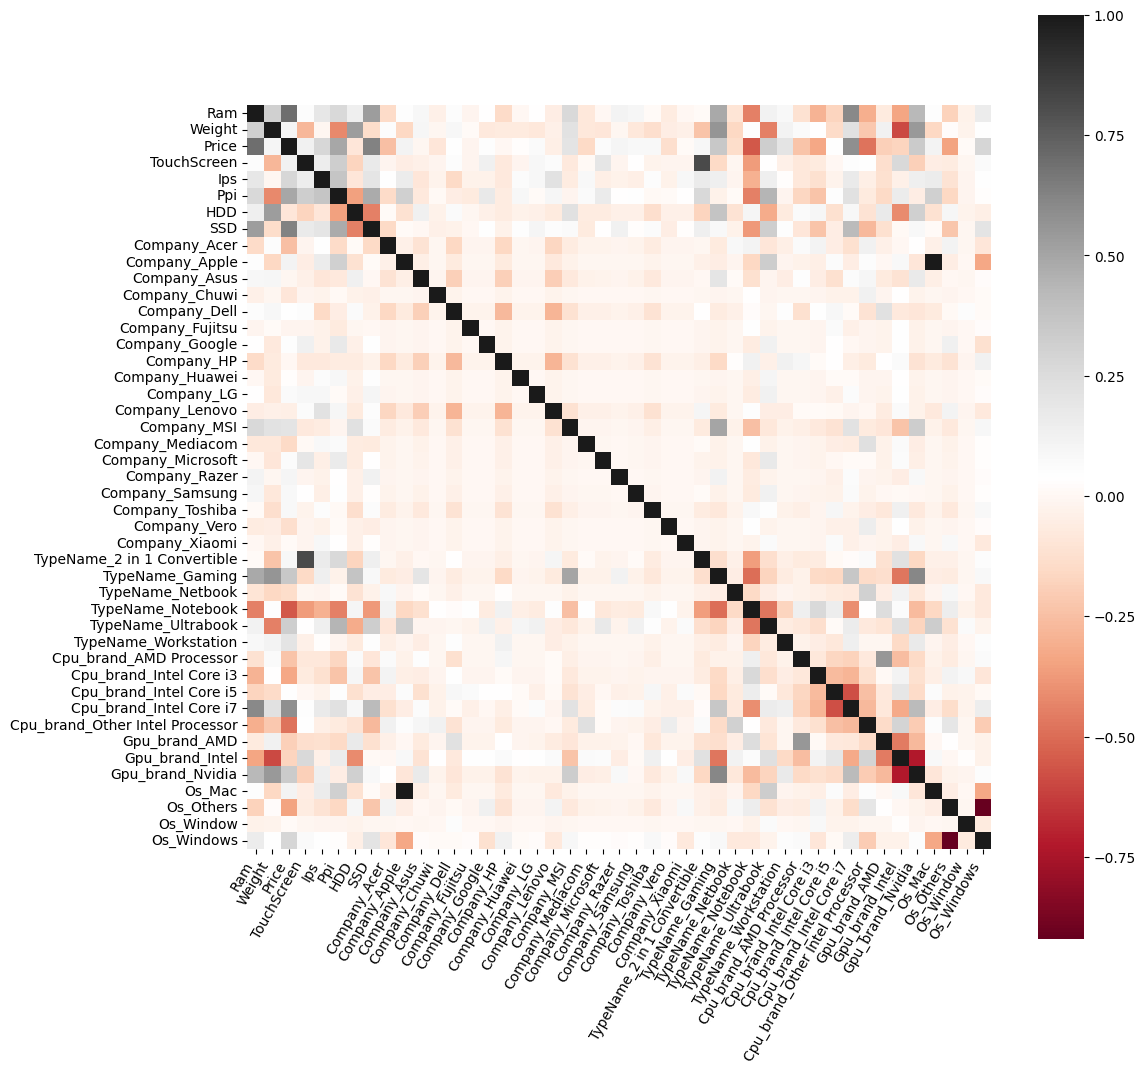

In [31]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr_mat, square=True, fmt='.2f', cmap='RdGy')
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


По данной матрице можно заметить, что положительную корреляцию, близкую к 1, имеют признаки `Os_Mac` и `Company_Apple`, так как все ноутбуки компании Apple имеют на борту операционную систему Mac OS.

Немного слабее коррелируют `Price` и `Ram`, `Price` и `SSD`, их значения находятся ближе к 0.5.

Отрицательную корреляцию имеют, например, следующие признаки: `Gpu_brand_Intel` и `Weight`, `Price` и `TypeName_Notebook`.

Отрицательную корреляцию, близую к 1, имеют признаки `Os_Windows` и `Os_Others`.

Если на пересечении двух признаков значение корреляции равно 0, то эти признаки друг от друга не зависят, например `Weight` и `Ips`.

Построим графики выше приведённых примеров, чтобы по ним проследить зависимость значений.

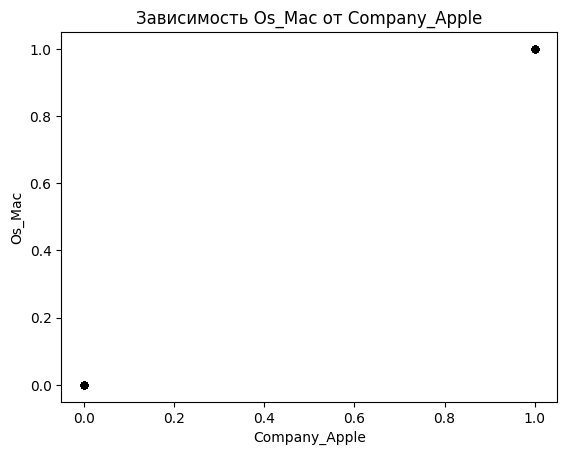

In [32]:
data_raw.plot(kind='scatter', x='Company_Apple', y='Os_Mac', color = 'black')
plt.title('Зависимость Os_Mac от Company_Apple')
plt.show()

Действительно, если ноутбук от компании Apple, то ОС будет Mac. Иначе же, будет другая ОС.

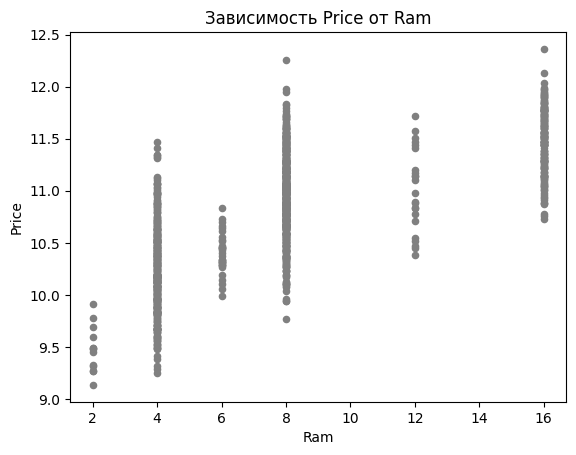

In [33]:
data_raw.plot(kind='scatter', x='Ram', y='Price', color = 'gray')
plt.title('Зависимость Price от Ram')
plt.show()

Как мы видим, прослеживается взаимосвязь между ценой ноутбука и количеством ОЗУ в нём.

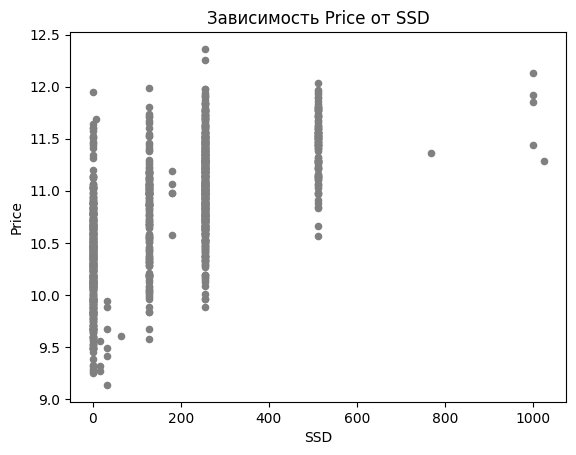

In [34]:
data_raw.plot(kind='scatter', x='SSD', y='Price', color = 'gray')
plt.title('Зависимость Price от SSD')
plt.show()

Аналогично цена ноутбука зависит от размера SSD.

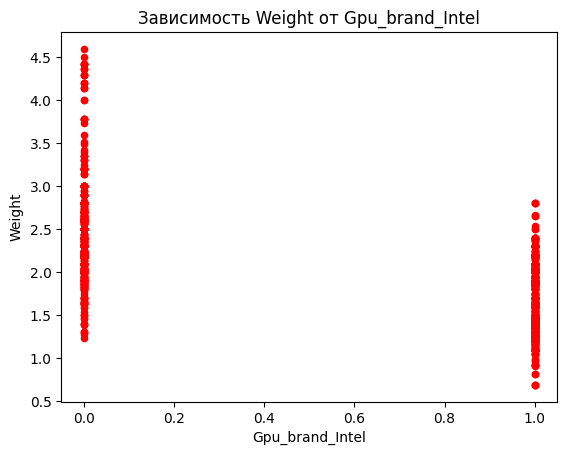

In [35]:
data_raw.plot(kind='scatter', x='Gpu_brand_Intel', y='Weight', color = 'red')
plt.title('Зависимость Weight от Gpu_brand_Intel')
plt.show()

Как мы можем заметить, у всех тяжелых ноутбуков нет графического процессора от Intel, это связано с тем, что тяжелые ноутбуки, как правило, оснащены дискретными видеокартами, из-за которых ноутбук и становится тяжелее, а Intel базируется только на встроенных графических процессорах.

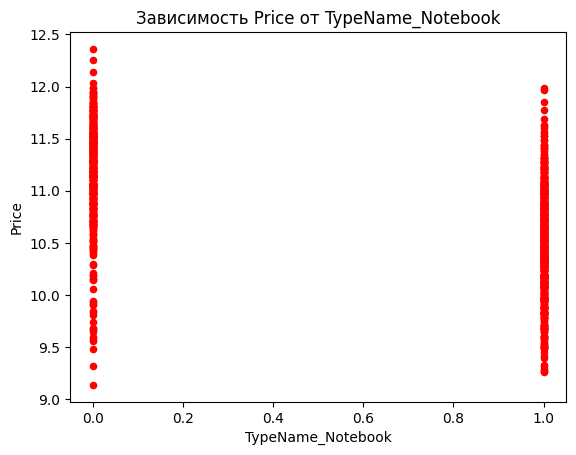

In [36]:
data_raw.plot(kind='scatter', x='TypeName_Notebook', y='Price', color = 'red')
plt.title('Зависимость Price от TypeName_Notebook')
plt.show()

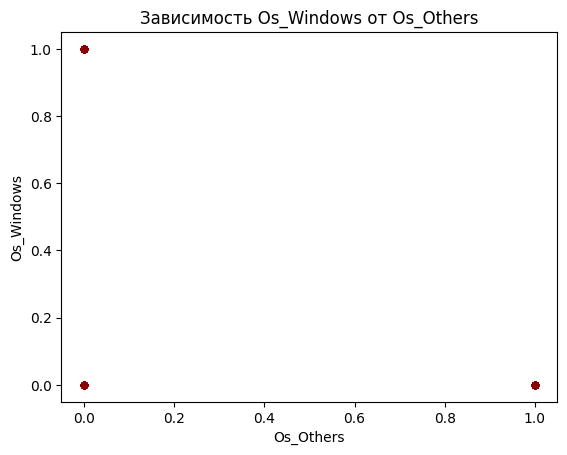

In [37]:
data_raw.plot(kind='scatter', x='Os_Others', y='Os_Windows', color = 'darkred')
plt.title('Зависимость Os_Windows от Os_Others')
plt.show()

Здесь видно, что если при покупке ноутбука установлена ОС Windows, то никакая другая система не может быть установлена. Аналогично, если стоит другая ОС, то не может стоять ОС Windows. Либо же, никакая ОС не установлена.

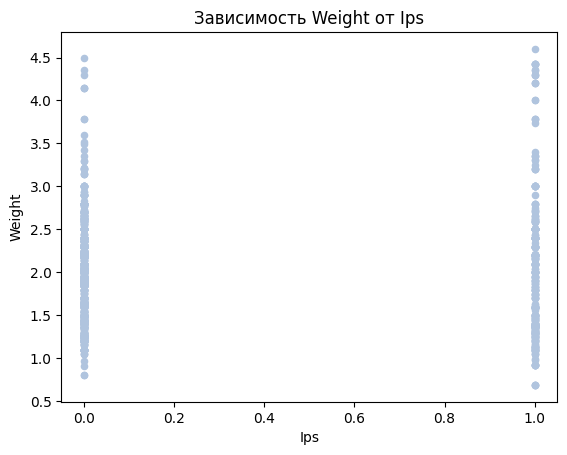

In [38]:
data_raw.plot(kind='scatter', x='Ips', y='Weight', color = 'lightsteelblue')
plt.title('Зависимость Weight от Ips')
plt.show()

# Нормализация данных

Нормализация данных - важный этап в подготовке данных для обучения моделей машинного обучения. Нормализуем данные с помощью стандартизации.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data_raw), columns=data_raw.columns)
norm_data

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Acer,Company_Apple,...,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Mac,Os_Others,Os_Window,Os_Windows
0,0.025112,-1.069157,0.658924,-0.371800,1.664176,3.182333,-0.820409,-0.254691,-0.301936,7.367884,...,1.368854,-0.791233,-0.339520,-0.415605,0.902254,-0.656937,7.367884,-0.374795,-0.029361,-2.456901
1,0.025112,-1.117661,-0.017693,-0.371800,-0.600898,-0.431973,-0.820409,-1.029335,-0.301936,7.367884,...,1.368854,-0.791233,-0.339520,-0.415605,0.902254,-0.656937,7.367884,-0.374795,-0.029361,-2.456901
2,2.107621,-0.325433,1.742118,-0.371800,1.664176,2.947638,-0.820409,2.069241,-0.301936,7.367884,...,-0.730538,1.263849,-0.339520,2.406133,-1.108335,-0.656937,7.367884,-0.374795,-0.029361,-2.456901
3,0.025112,-1.069157,1.163187,-0.371800,1.664176,3.182333,-0.820409,0.519953,-0.301936,7.367884,...,1.368854,-0.791233,-0.339520,-0.415605,0.902254,-0.656937,7.367884,-0.374795,-0.029361,-2.456901
4,-1.016142,0.111100,-1.390934,-0.371800,-0.600898,-1.422791,0.144319,-1.029335,3.311959,-0.135724,...,-0.730538,-0.791233,-0.339520,2.406133,-1.108335,-0.656937,-0.135724,-0.374795,-0.029361,0.407017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,0.025112,0.434459,-0.202790,-0.371800,-0.600898,-1.422791,1.109047,-1.029335,-0.301936,-0.135724,...,-0.730538,1.263849,-0.339520,2.406133,-1.108335,-0.656937,-0.135724,2.668123,-0.029361,-2.456901
1157,-1.536770,-1.392516,-2.491781,-0.371800,-0.600898,-0.162051,-0.820409,-1.029335,-0.301936,-0.135724,...,-0.730538,-0.791233,2.945335,-0.415605,0.902254,-0.656937,-0.135724,-0.374795,-0.029361,0.407017
1158,-1.016142,0.272780,-0.393366,-0.371800,-0.600898,-1.422791,0.144319,-1.029335,-0.301936,-0.135724,...,-0.730538,1.263849,-0.339520,-0.415605,-1.108335,1.522216,-0.135724,-0.374795,-0.029361,0.407017
1159,-1.016142,-0.373937,-0.599173,2.689618,1.664176,0.647989,-0.820409,-0.254691,-0.301936,-0.135724,...,-0.730538,1.263849,-0.339520,-0.415605,0.902254,-0.656937,-0.135724,-0.374795,-0.029361,0.407017


# Разбиение данных на обучающую и тестовую выборки

Для предсказания значения цены будем использовать все входные признаки.

In [40]:
norm_data.isnull().sum()

,0
Ram,0
Weight,0
Price,0
TouchScreen,0
Ips,0
Ppi,0
HDD,0
SSD,0
Company_Acer,0
Company_Apple,0


In [41]:
X = norm_data.drop(columns=['Price'])
y = norm_data['Price']

In [42]:
type(X)

pandas.core.frame.DataFrame

In [43]:
type(y)

pandas.core.series.Series

Данные нужно разбить на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер тестовой выборки:", X_test.shape, y_test.shape)

Размер обучающей выборки: (870, 44) (870,)
Размер тестовой выборки: (291, 44) (291,)


# Запуск регрессии и вычисление ошибки на обучающей и тестовой выборках.

## Линейная регрессия

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

RMSE_train - 0.40946267560095806
RMSE_test - 0.3899069552710089
R2_train - 0.8335148651619388
R2_test - 0.8444666901434087



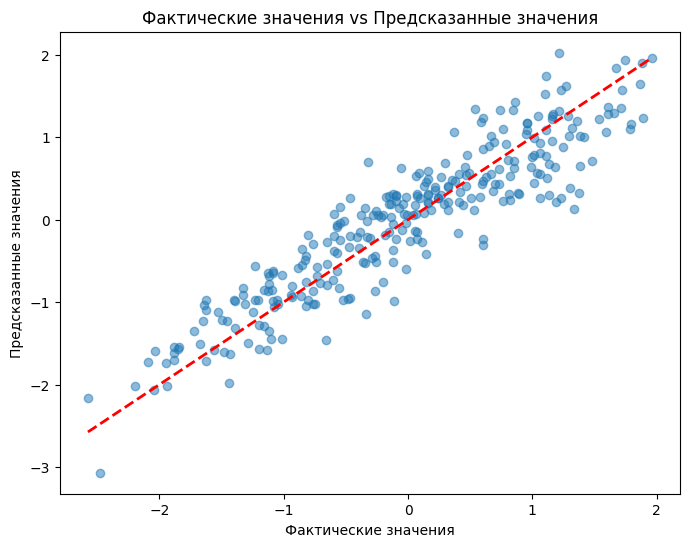

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические значения vs Предсказанные значения")
plt.show()

## Метод $k$ ближайших соседей ($k$NN, $k$ nearest neighbours)

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors=5) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

RMSE_train - 0.350727208459786
RMSE_test - 0.38084896662050416
R2_train - 0.8778521746657598
R2_test - 0.851609187558994



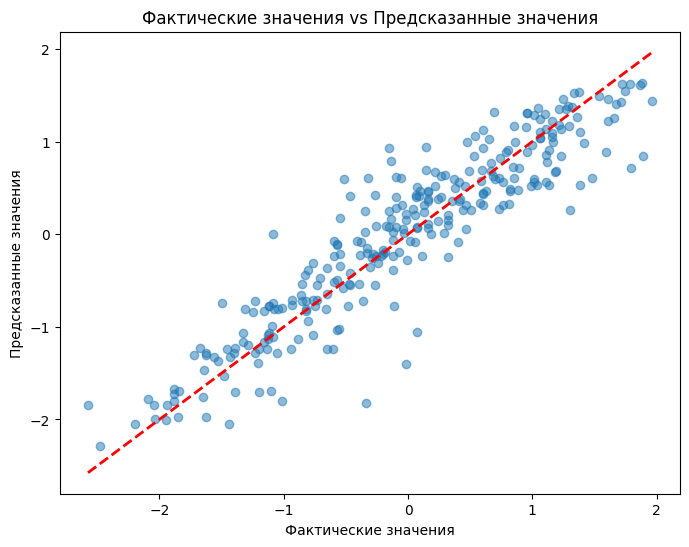

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические значения vs Предсказанные значения")
plt.show()

### Подбор гиперпараметров для kNN

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

ppl = Pipeline([('fit', KNeighborsRegressor())])

k_arr = np.array([1, 2, 3, 4, 5, 7, 10, 15, 20, 25, 30, 40, 50])

params = {
    'fit__n_neighbors': k_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(-0.20327497966691604, {'fit__n_neighbors': 3})

Text(0, 0.5, 'MSE')

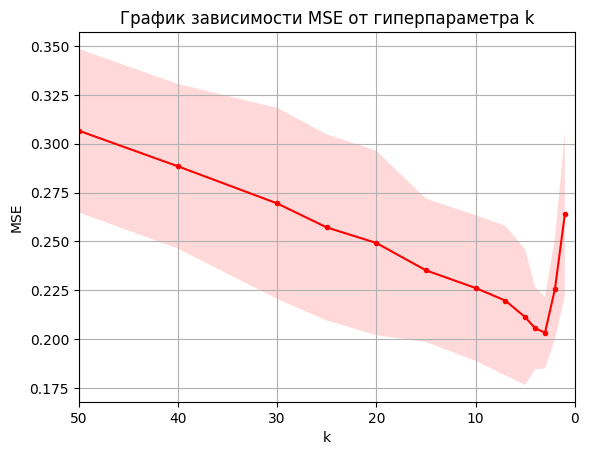

In [50]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.title('График зависимости MSE от гиперпараметра k')
plt.plot(k_arr, MSE_arr, 'r.-')
plt.fill_between(k_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(k_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')

Запустим регрессию с найденным пареметром k.

In [51]:
model = KNeighborsRegressor(n_neighbors=model.best_params_['fit__n_neighbors'])
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

RMSE_train - 0.30295980604812683
RMSE_test - 0.40094825669448325
R2_train - 0.9088583576038012
R2_test - 0.8355332507221127



## Случайный лес (Random Forest)

In [52]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

RMSE_train - 0.14635148670959194
RMSE_test - 0.33888962681475265
R2_train - 0.9787312924622348
R2_test - 0.8825053746764919



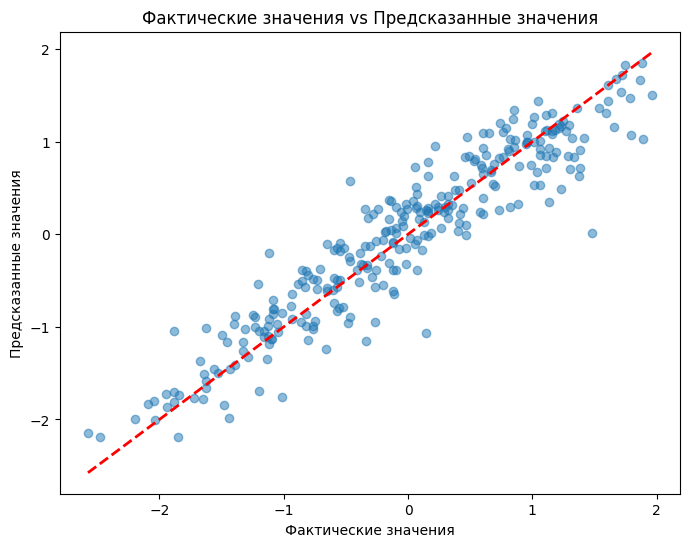

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические значения vs Предсказанные значения")
plt.show()

Благодаря методу случайный лес можно получить оценки "важности" признаков: чем значение больше, тем признак важнее.

In [54]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

,0
Ram,0.527009
Weight,0.091768
TypeName_Notebook,0.069771
Cpu_brand_Other Intel Processor,0.066618
Ppi,0.053146
SSD,0.038546
Cpu_brand_Intel Core i5,0.030022
TypeName_Workstation,0.013215
Cpu_brand_Intel Core i7,0.010322
Os_Others,0.009437


Визуализируем эти данные на диаграмме:

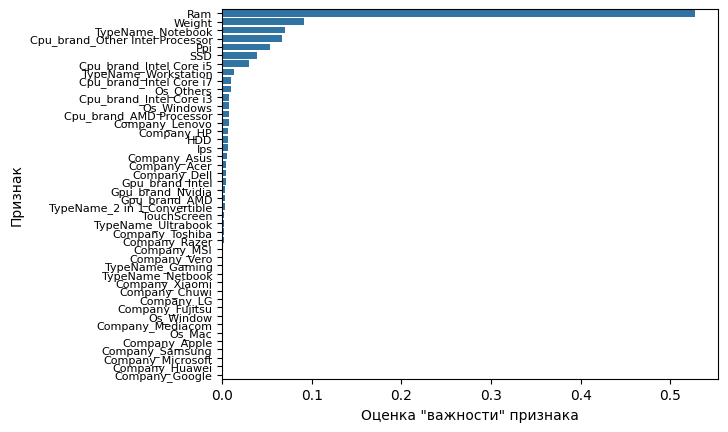

In [55]:
sns.barplot(y=importances.index, x=importances, orient="h")
plt.xlabel('Оценка "важности" признака')
plt.ylabel('Признак')
plt.yticks(fontsize=8)
plt.show()

### Подбор гиперпараметров для случайного леса

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

ppl = Pipeline([('fit', RandomForestRegressor())])

n_arr = np.array([25, 50, 75, 100, 125, 150, 175, 200, 225, 250])

params = {
    'fit__n_estimators': n_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(-0.14027467682088715, {'fit__n_estimators': 225})

Text(0, 0.5, 'MSE')

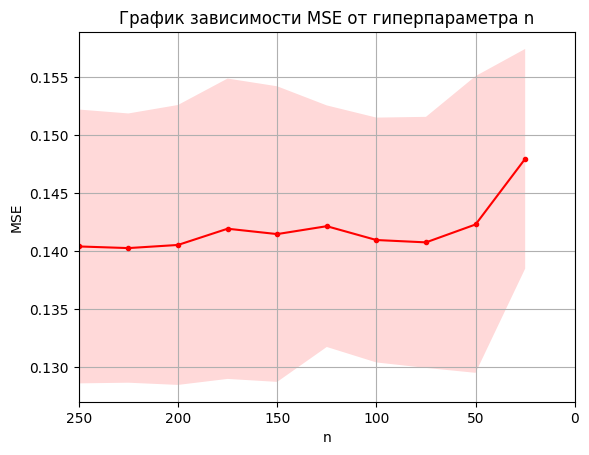

In [57]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.title('График зависимости MSE от гиперпараметра n')
plt.plot(n_arr, MSE_arr, 'r.-')
plt.fill_between(n_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(n_arr), 0])
plt.grid()
plt.xlabel('n')
plt.ylabel('MSE')

Запустим регрессию с найденным пареметром n.

In [58]:
model = RandomForestRegressor(n_estimators=model.best_params_['fit__n_estimators'])
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

RMSE_train - 0.14590165805655878
RMSE_test - 0.335963795704462
R2_train - 0.9788618353245239
R2_test - 0.8845254155531437



# Заключение
### Линейная регрессия:

- RMSE на обучающем наборе: 0.4095
- RMSE на тестовом наборе: 0.3899
- R² на обучающем наборе: 0.834
- R² на тестовом наборе: 0.844

Линейная регрессия показала средний уровень точности, с хорошей согласованностью между обучающей и тестовой выборками. R² получился примерно 84%. Однако по сравнению с другими моделями она менее точна.

### kNN:

- RMSE на обучающем наборе: 0.3507
- RMSE на тестовом наборе: 0.3808
- R² на обучающем наборе: 0.878
- R² на тестовом наборе: 0.852

Метод kNN показал более высокую точность, чем линейная регрессия, с улучшением метрики R² до 85% на тестовой выборке. Разница между ошибкой на обучающей и тестовой выборках относительно небольшая, что указывает на умеренное качество обобщения.

Результаты после оптимизации гиперпараметров:
- RMSE на обучающем наборе: 0.3030
- RMSE на тестовом наборе: 0.4009
- R² на обучающем наборе: 0.909
- R² на тестовом наборе: 0.836

После оптимизации (выбор 3-х соседей) модель kNN показывает немного лучшее качество на обучающей выборке, но при этом небольшое ухудшение на тестовой (R² снизился до 83.6%, а RMSE на тестовой выборке немного увеличился). Это указывает на возможную переоптимизацию для обучающей выборки.

### Случайный лес:

- RMSE на обучающем наборе: 0.1464
- RMSE на тестовом наборе: 0.3389
- R² на обучающем наборе: 0.979
- R² на тестовом наборе: 0.883

Случайный лес демонстрирует самую высокую точность с R² на уровне 98% на обучающей и 88% на тестовой выборках, но есть признаки переобучения (разница в ошибках на обучающей и тестовой выборках).

Результаты после оптимизации гиперпараметров:
- RMSE на обучающем наборе: 0.1459
- RMSE на тестовом наборе: 0.3360
- R² на обучающем наборе: 0.979
- R² на тестовом наборе: 0.885

Оптимизация случайного леса (225 деревьев) немного улучшила точность на тестовой выборке, т.к. R² повысился до 88.5%, а RMSE снизился до 0.3360. Модель сохраняет признаки переобучения, но остается наиболее точной.

### Заключение:
Наиболее эффективной моделью для прогнозирования цен на ноутбуки является случайный лес, с наибольшей точностью и самой низкой ошибкой. Несмотря на признаки переобучения, результаты на тестовой выборке достаточно стабильные. Модель kNN показала хорошие результаты, но после оптимизации модель стала немного хуже работать на тестовых данных. Линейная регрессия работает удовлетворительно, но уступает нелинейным моделям.